### Import Libraries and Dependencies

In [1]:
import pandas as pd
from pathlib import Path

### Read in CSV as Pandas DataFrame and Set the Index

In [5]:
# Read in data
csv_path = Path("../Resources/twtr_google_finance.csv")
ticker_data = pd.read_csv(csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True) # this code set the date to index and make it as datetime object
ticker_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2019-04-09 to 2019-05-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes


### Display DataFrame Index

In [6]:
ticker_data.index

DatetimeIndex(['2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
               '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01',
               '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07',
               '2019-05-08', '2019-05-09'],
              dtype='datetime64[ns]', name='Date', freq=None)

### Create Multiple Indices by Grouping By DatetimeIndex `year`, `month`, and `day` with `first` Function

In [7]:
# Group by year, month, and day and grab first of each group
ticker_data_grp = ticker_data.groupby([ticker_data.index.year, ticker_data.index.month, ticker_data.index.day]).first()
ticker_data_grp

Close
Date Date Date           
2019 4    9     35.139999
          10    34.750000
          11    34.580002
          12    34.369999
          15    34.709999
          16    34.459999
          17    34.480000
          18    34.400002
          22    34.389999
          23    39.770000
          24    39.290001
          25    38.480000
          26    38.669998
          29    39.779999
          30    39.910000
     5    1     39.290001
          2     39.950001
          3     40.799999
          6     40.230000
          7     38.619999
          8     38.580002
          9     38.790001

### Create Multiple Indices by Grouping By DatetimeIndex `year` and `month` with `first` Function

In [10]:
# Group by year and month and take the first value of each group
ticker_data_grp_2 = ticker_data.groupby([ticker_data.index.year, ticker_data.index.month]).first()
ticker_data_grp_2

Close
Date Date           
2019 4     35.139999
     5     39.290001

### Create Multiple Indices by Grouping By DatetimeIndex `year` and `month` with `last` Function

In [11]:
# Group by year and month and take the last value of each group
ticker_data_grp_3 = ticker_data.groupby([ticker_data.index.year, ticker_data.index.month]).last()
ticker_data_grp_3

Close
Date Date           
2019 4     39.910000
     5     38.790001

### Create Multiple Indices by Grouping By DatetimeIndex `year` and `month` with `mean` Function

In [14]:
# Group by year and month and calculate the average of each group
ticker_data_grp_4 = ticker_data.groupby([ticker_data.index.year, ticker_data.index.month]).mean()
ticker_data_grp_4

Close
Date Date           
2019 4     36.478666
     5     39.465715

### Slice Data for 4/12/2019

In [15]:
# Slice data for 4/12/2019 from first group
ticker_data_slice = ticker_data_grp.loc[2019,4,12]
ticker_data_slice

Close    34.369999
Name: (2019, 4, 12), dtype: float64

### Slice Data For All Days in April 2019

In [16]:
# Slice data for April 2019 from first group
ticker_data_slice = ticker_data_grp.loc[2019,4]
ticker_data_slice

,Close
Date,
9,35.139999
10,34.750000
11,34.580002
12,34.369999
15,34.709999
16,34.459999
17,34.480000
18,34.400002
22,34.389999


<AxesSubplot:xlabel='Date'>

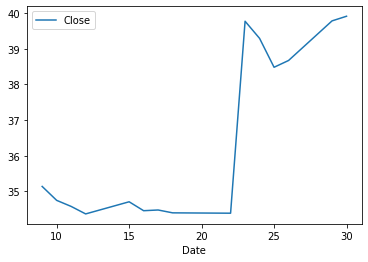

In [17]:
ticker_data_slice.plot()